### Section 1
###Install packages needed for TabNet
You need to run these codes inorder to train and test TabNet

In [3]:
!pip install pytorch-tabnet
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 515 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ad74cc289303028b02d8a8160ffb176b57cd692e6164e5325690e13867554493
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1
# This transformer should be used to encode target values, i.e. y, and not the input X.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(0)


import os
import wget
from pathlib import Path
import shutil
import gzip

from matplotlib import pyplot as plt
%matplotlib inline

### Section 2
### Upload apple-attribute dataset
Follow the instructions inorder to upload the data


In [18]:
# First run this code
dataset_name = 'apple-attribute'
tmp_out = Path('./data/'+dataset_name+'.gz')
out = Path(os.getcwd()+'/data/'+dataset_name+'.csv')

In [19]:
# Then run this code to create the directory
out.parent.mkdir(parents=True, exist_ok=True)

In [17]:
# You do NOT need to run this one
out.parent.mkdir(parents=True, exist_ok=True)
if out.exists():
    print("File already exists.")
else:
    print("Downloading file...")
    wget.download(url, tmp_out.as_posix())
    with gzip.open(tmp_out, 'rb') as f_in:
        with open(out, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

File already exists.


In [20]:
# Run this short code
# Now upload apple-attribute.csv file manually so that the file's absolute path is the same as the output printed below
# Make sure the file name is 'apple-attribute'
print(out)

/content/data/apple-attribute.csv


### Section 3
### Finding out important features of data
This part of the section is not necessary. But if you wish to find out features that are most realated to the Brix level, you should try running this code

In [22]:
# Run this
!pip install category-encoders
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest # Getting f_regresison, and SelectKBest 

In [23]:
# Run this too
# Even if there is a warning, there's no problem with the code
encoder = OneHotEncoder(use_cat_names = True)

df = pd.read_csv('/content/data/apple-attribute-classname.csv') # , header=None, names=feature_columns

df1 = encoder.fit_transform(df) # if there is no string variable, there will be warning. but dw

df1.head()

,red,green,blue,r,rg,most_red,least_red,most_yellow,size,sweetness
0,184.66,90.55,44.45,49.66,230.76,157,-208,368,10603,2
1,143.38,32.91,46.23,64.24,130.06,154,-239,335,9954,2
2,152.75,26.75,41.77,84.23,137.73,167,-248,300,9773,2
3,172.13,36.68,50.80,84.65,158.01,171,-161,276,9985,2
4,176.63,62.04,37.88,76.71,200.79,163,-139,374,9980,2


In [25]:
X = df1[df1.columns.difference(['sweetness'])]
y = df1[['sweetness']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.999, test_size=0.001)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df1.shape)

(1198, 9)
(2, 9)
(1198, 1)
(2, 1)
(1200, 10)


In [37]:
# searching for k number of features that are most correlated to the Brix level
# change k in line 6 to see the most imoportant features

# I used f-regresssion method
## define selector
selector = SelectKBest(score_func=f_regression, k=8) # <---- chage this k, then run this code and check the output for important features.
## fit_transform on train data
X_train_selected = selector.fit_transform(X_train, y_train)
## transform on test data
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

all_names = X_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## selected names
selected_names = all_names[selected_mask]
## not selected names
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['blue', 'green', 'least_red', 'most_red', 'r', 'red', 'rg', 'size'], dtype='object')
Unselected names:  Index(['most_yellow'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


results can very with different dataframes
1. r
2. most_red
3. green
4. size
5. blue
6. rg
7. least_red
8. red
9. most_yellow

### Section 4
### Load data and split
Follow the code to load and split data

In [40]:
# Run this code
target = "sweetness" # Do not change this

int_columns = [ # Put the features that you will be using
    "green",
    "r",
    "most_red", "size"
]

feature_columns = (int_columns + [target]) # length = 4 + 1 = 5

In [42]:
# checking feature_columns
# The output should be the list of your features and the target
for i in feature_columns:
  print(i) 

green
r
most_red
size
sweetness


In [45]:
train = pd.read_csv(out, header=None, names=feature_columns)

n_total = len(train)

# Train, val and test split follows
train_val_indices, test_indices = train_test_split(
    range(n_total), test_size=0.2, random_state=None) # test_size will determine the size of test data, random_state controls the shuffling process.
train_indices, valid_indices = train_test_split(
    train_val_indices, test_size=0.2 / 0.8, random_state=None) # test_size will determine the size of validation data

### Section 5
### Simple preprocessing
Label encode categorical features and fill empty cells. You don't really need to understand this part, just run them if you can't understand

In [47]:
categorical_columns = [] #python list
categorical_dims =  {} #python dictionary
for col in train.columns[train.dtypes == object]: #train은 위에서 만든 pandas DataFrame, train.dtypes는 
    print(col, train[col].nunique()) # nunique() returns the number of unique values for each column
    l_enc = LabelEncoder()
    train[col] = train[col].fillna("VV_likely") #fill NA values using specified method
    train[col] = l_enc.fit_transform(train[col].values) # Fit label encoder and return encoded labels
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)

for col in train.columns[train.dtypes == 'float64']:
    train.fillna(train.loc[train_indices, col].mean(), inplace=True)

### 뭔말인지 하나도 모르겠네
## ignore me :)
간단한 전처리로 컬럼의 unique한 값이 200개 이하이면 Categorical 변수로 변환하고, 200개 이상인 경우 Numerical로 판단하여 Null value를 평균값으로 대체해줍니다.




그리고 논문리뷰에서 설명했듯이 TabNet은 입력으로 Categorical변수를 Embedding 하기 때문에, Categorical 변수라는 것을 지정해주어야 합니다. 따라서, cat_idxs와 cat_dims를 저장해둡니다.

### Section 6
### Define categorical features for categorical embeddings
Just run them

In [49]:
# Categorical Embedding을 위해 Categorical 변수의 차원과 idxs를 담음.
unused_feat = []

# features is a list that has the features as elements
features = [ col for col in train.columns if col not in unused_feat+[target]] 

# List of categorical features indices. Mandatory for embeddings
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

# List of categorical features number of modalities (number of unique values for a categorical feature). Mandatory for embeddings
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

### Section 7
### Network parameters
Creating the model

In [51]:
# Run
# refer https://github.com/dreamquark-ai/tabnet for Model parameters
# You can try changing the parameters to find out the best result

clf = TabNetClassifier( 
    n_d=64, 
    n_a=64, 
    n_steps=5,
    gamma=1.5, 
    n_independent=2, 
    n_shared=2,
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=1,
    lambda_sparse=1e-4, 
    momentum=0.3,
    clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2), #2e-2 is origianl
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

### Section 8
### Training

In [52]:
# Run, u don't need to understand
if os.getenv("CI", False):
# Take only a subsample to run CI
    X_train = train[features].values[train_indices][:1000,:] # train_indices = list of train indexes
    y_train = train[target].values[train_indices][:1000]
else:
    X_train = train[features].values[train_indices]
    y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

In [53]:
# checking how X_train looks like
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3
0,44.18,35.51,140.0,16141.0
1,66.23,9.64,81.0,9586.0
2,183.01,-74.12,62.0,11111.0
3,106.94,14.48,118.0,13715.0
4,102.23,22.12,128.0,11912.0


In [69]:
# Increasing the max_epochs might help get a better accuracy
# The original max_epochs value was 50
max_epochs = 100 if not os.getenv("CI", False) else 2

In [70]:
# This will train the model
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    max_epochs=max_epochs, patience=100,
    batch_size=16, # changing the batch_size will help he accuracy go up, batch sized have to be multiple of 2
    virtual_batch_size=16, # virtual_batch_size should be same as virtual_batch_size
    augmentations=aug
)

epoch 0  | loss: 1.81205 | train_accuracy: 0.35    | valid_accuracy: 0.38333 |  0:00:03s
epoch 1  | loss: 1.09727 | train_accuracy: 0.35    | valid_accuracy: 0.3875  |  0:00:06s
epoch 2  | loss: 1.04531 | train_accuracy: 0.36528 | valid_accuracy: 0.38333 |  0:00:10s
epoch 3  | loss: 1.01742 | train_accuracy: 0.44167 | valid_accuracy: 0.4125  |  0:00:13s
epoch 4  | loss: 1.03126 | train_accuracy: 0.4625  | valid_accuracy: 0.42083 |  0:00:16s
epoch 5  | loss: 1.01319 | train_accuracy: 0.46944 | valid_accuracy: 0.39583 |  0:00:20s
epoch 6  | loss: 1.02247 | train_accuracy: 0.5     | valid_accuracy: 0.4375  |  0:00:23s
epoch 7  | loss: 1.02049 | train_accuracy: 0.45833 | valid_accuracy: 0.45417 |  0:00:26s
epoch 8  | loss: 1.0139  | train_accuracy: 0.49861 | valid_accuracy: 0.42083 |  0:00:30s
epoch 9  | loss: 1.01203 | train_accuracy: 0.47639 | valid_accuracy: 0.49167 |  0:00:33s
epoch 10 | loss: 1.01559 | train_accuracy: 0.50139 | valid_accuracy: 0.45417 |  0:00:36s
epoch 11 | loss: 1.00

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


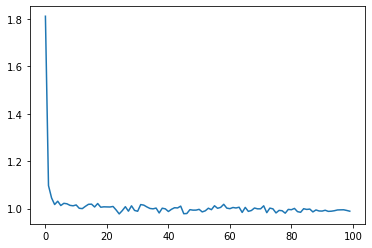

In [71]:
# plot the losses
plt.plot(clf.history['loss'])

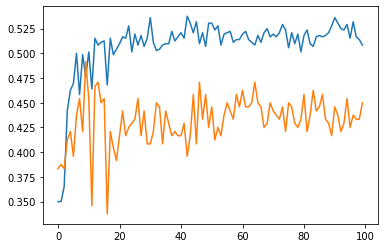

In [72]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])
# blue is the train_accuracy
# yellow is the valid_accuracy

### Section 9
###Predictions

In [73]:
# To get final results you may need to use a mapping for classes 
# as you are allowed to use targets like ["yes", "no", "maybe", "I don't know"]

preds_mapper = { idx : class_name for idx, class_name in enumerate(clf.classes_)}

preds = clf.predict_proba(X_test)

y_pred = np.vectorize(preds_mapper.get)(np.argmax(preds, axis=1))

test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f"BEST VALID SCORE FOR {dataset_name} : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_acc}")

BEST VALID SCORE FOR apple-attribute : 0.49166666666666664
FINAL TEST SCORE FOR apple-attribute : 0.425


### Section 10
### Save and load Model
You don't really need to worry about from section 10

In [ ]:
# save state dict
saved_filename = clf.save_model('test_model')

Successfully saved model at test_model.zip


In [ ]:
# define new model and load save parameters
loaded_clf = TabNetClassifier()
loaded_clf.load_model(saved_filename)

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
loaded_preds = loaded_clf.predict_proba(X_test)
loaded_y_pred = np.vectorize(preds_mapper.get)(np.argmax(loaded_preds, axis=1))

loaded_test_acc = accuracy_score(y_pred=loaded_y_pred, y_true=y_test)

print(f"FINAL TEST SCORE FOR {dataset_name} : {loaded_test_acc}")

FINAL TEST SCORE FOR apple-attribute : 0.36666666666666664


In [ ]:
assert(test_acc == loaded_test_acc)

###Global explainability : feat importance summing to 1

In [ ]:
clf.feature_importances_

array([0.16593812, 0.10855426, 0.27246367, 0.45304395])

###Local explainability and masks

In [ ]:
explain_matrix, masks = clf.explain(X_test)

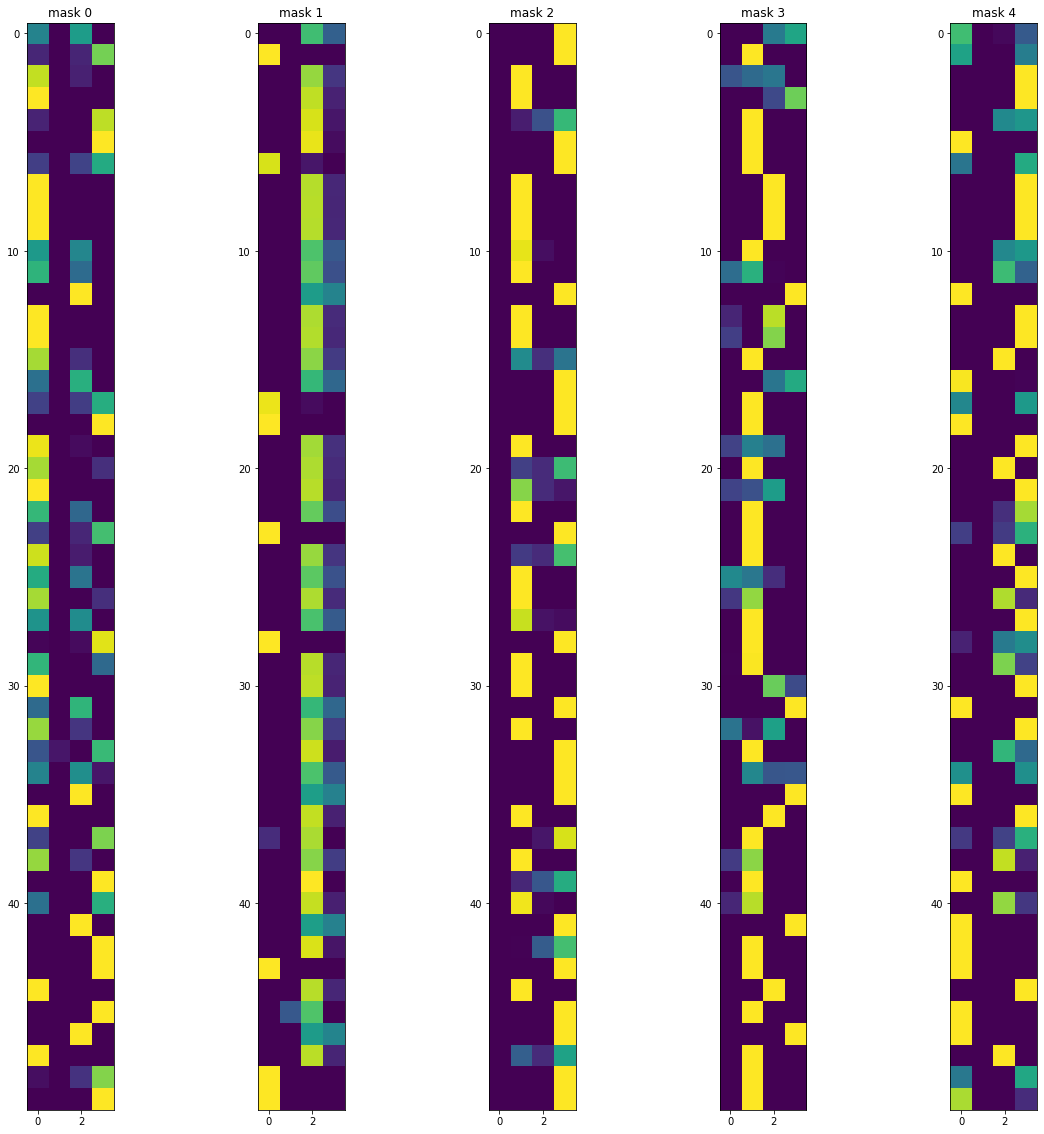

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

### XGB
This is a machine learning model

In [ ]:
  n_estimators = 1000 if not os.getenv("CI", False) else 20

In [ ]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=8,
    learning_rate=0.1,
    n_estimators=n_estimators,
    verbosity=0,
    silent=None,
    objective="multi:softmax",
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)

clf_xgb.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            early_stopping_rounds=40,
            verbose=10)

[0]	validation_0-merror:0.713396
Will train until validation_0-merror hasn't improved in 40 rounds.
[10]	validation_0-merror:0.647975
[20]	validation_0-merror:0.632399
[30]	validation_0-merror:0.629283
[40]	validation_0-merror:0.641745
[50]	validation_0-merror:0.654206
[60]	validation_0-merror:0.632399
Stopping. Best iteration:
[27]	validation_0-merror:0.619938



XGBClassifier(max_depth=8, n_estimators=1000, n_jobs=-1,
              objective='multi:softprob', subsample=0.7, verbosity=0)

In [ ]:
preds_valid = np.array(clf_xgb.predict_proba(X_valid, ))
valid_acc = accuracy_score(y_pred=np.argmax(preds_valid, axis=1) + 1, y_true=y_valid)
print(valid_acc)

preds_test = np.array(clf_xgb.predict_proba(X_test))
test_acc = accuracy_score(y_pred=np.argmax(preds_test, axis=1) + 1, y_true=y_test)
print(test_acc)

0.0
0.0
